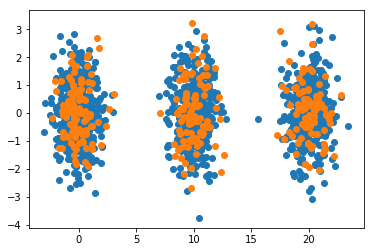

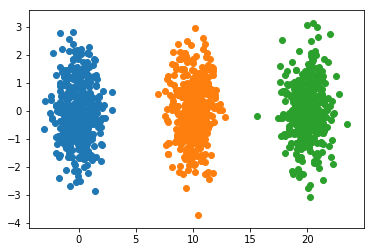

In [72]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plot

v1all = np.random.multivariate_normal([0,0],[[0,1],[1,0]],500)
v2all = np.random.multivariate_normal([10,0],[[0,1],[1,0]],500)
v3all = np.random.multivariate_normal([20,0],[[0,1],[1,0]],500)

t1 = np.ones(500)
t2 = np.ones(500)*2
t3 = np.ones(500)*3

a1all= np.vstack([v1all[:,0],v1all[:,1],t1]).T
a2all= np.vstack([v2all[:,0],v2all[:,1],t2]).T
a3all= np.vstack([v3all[:,0],v3all[:,1],t3]).T

all = np.vstack([a1all,a2all,a3all])

np.random.shuffle(all)

atrain = all[:int(len(all)*0.8),:]
atest  = all[int(len(all)*0.8):,:]

plot.scatter(atrain[:,0],atrain[:,1])
plot.scatter(atest[:,0],atest[:,1])
plot.show()

for i in range(1,4):
    plot.scatter(atrain[i==atrain[:,2],0],atrain[i==atrain[:,2],1])
plot.show()    

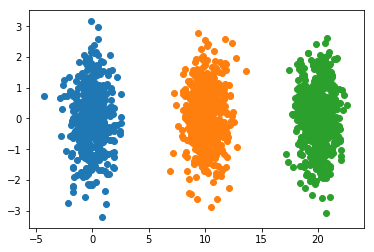

In [73]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plot
from sklearn import datasets,cluster,discriminant_analysis,decomposition,neighbors

cov=[[0,1],[1,0]]

cluster1=np.random.multivariate_normal([0,0], cov, 500).T
cluster2=np.random.multivariate_normal([10,0], cov, 500).T
cluster3=np.random.multivariate_normal([20,0], cov, 500).T

train1=cluster1[:int(len(cluster1))]
train2=cluster1[:int(len(cluster2))]
train3=cluster1[:int(len(cluster3))]

test1=cluster1[int(len(cluster1)):]
test2=cluster2[int(len(cluster2)):]
test3=cluster3[int(len(cluster3)):]

plot.scatter(cluster1[0],cluster1[1])
plot.scatter(cluster2[0],cluster2[1])
plot.scatter(cluster3[0],cluster3[1])
plot.show()

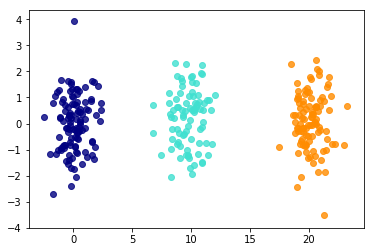

In [70]:
from sklearn.lda import LDA
clf= LDA()
clf.fit(atrain[:,:2],atrain[:,2])
prediction = clf.predict(atest[:,:2])

atestW = np.vstack([atest[:,0],atest[:,1], prediction]).T
colors = ['navy', 'turquoise', 'darkorange']
for color, i in zip(colors, [1, 2, 3]):
    plot.scatter(atestW[prediction==i, 0], atestW[prediction==i, 1], alpha=.8, color=color)
plot.show()

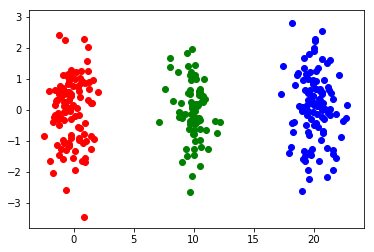

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

In [71]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plot
from sklearn import datasets,cluster,discriminant_analysis,decomposition,neighbors

cov=[[0,1],[1,0]]

cluster1=np.random.multivariate_normal([0,0], cov, 500).T
cluster2=np.random.multivariate_normal([10,0], cov, 500).T
cluster3=np.random.multivariate_normal([20,0], cov, 500).T

target1=np.ones(len(cluster1[0]))
target2=np.ones(len(cluster2[0]))*2
target3=np.ones(len(cluster3[0]))*3

cluster1=np.vstack([cluster1[0],cluster1[1],target1]).T
cluster2=np.vstack([cluster2[0],cluster2[1],target2]).T
cluster3=np.vstack([cluster3[0],cluster3[1],target3]).T

cluster=np.vstack([cluster1,cluster2,cluster3])
np.random.shuffle(cluster)

train=cluster[:int(0.8*len(cluster))]
test=cluster[int(0.8*len(cluster)):]

lda=discriminant_analysis.LinearDiscriminantAnalysis()
lda.fit(train[:,:2],train[:,2])
predicted=lda.predict(test[:,:2])

colors=["red","green","blue"]
for i,color in zip(range(1,4),colors):
    plot.scatter(test[predicted==i,0],test[predicted==i,1],color=color)
plot.show()    
    
print(test[:,2]-predicted)

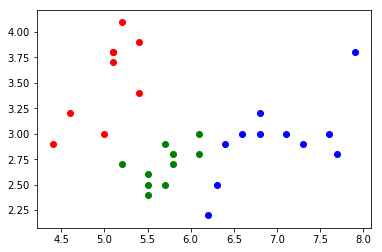

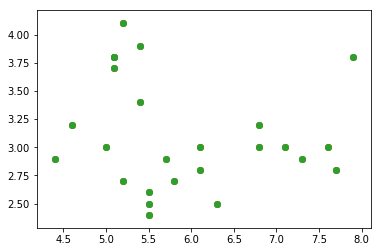

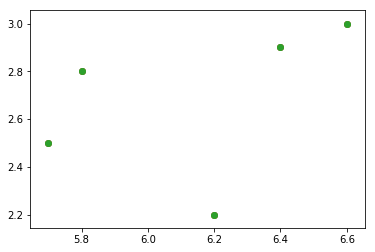

In [74]:
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
import matplotlib.pyplot as plot
iris = datasets.load_iris()
X = iris.data[:, :2]
Y = iris.target
all=np.vstack([X[:,0],X[:,1],Y]).T
np.random.shuffle(all)
train=all[:int(0.8*len(all[:,0])),:]
test=all[int(0.8*len(all[:,0])):,:]

lda=LinearDiscriminantAnalysis()
lda.fit(train[:,:2],train[:,2])
prediction = lda.predict(test[:,:2])

colors=['red','green','blue']
for i,color in zip([0,1,2],colors):
    plot.scatter(test[prediction==i,0],test[prediction==i,1],color=color)
plot.show()  

for i in range(0,3):
    plot.scatter(test[prediction==test[:,2],0],test[prediction==test[:,2],1])
plot.show() 

for i in range(0,3):
    plot.scatter(test[prediction!=test[:,2],0],test[prediction!=test[:,2],1])
plot.show() 


In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plot
from sklearn import datasets,discriminant_analysis,neighbors,decomposition,cluster

iris=datasets.load_iris()
data=iris.data
target=iris.target

all=np.vstack([data[:,0],data[:,1],target]).T
np.random.shuffle(all)

train=all[:int(0.8*len(target))]
test =all[int(0.8*len(target)):]

lda=discriminant_analysis.LinearDiscriminantAnalysis()
lda.fit(train[:,:2],train[:,2])
predict=lda.predict(test[:,:2])


for i in range(0,3):
    plot.scatter(test[predict==i,0],test[predict==i,1])
plot.show()

D:\Programs\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


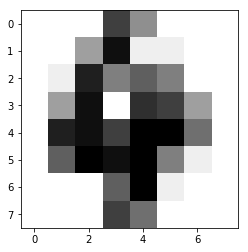

In [69]:
import sklearn.datasets as datasets
import sklearn.discriminant_analysis
import numpy as np
import scipy as sp
import matplotlib.pyplot as plot

digits = datasets.load_digits()
x=digits.data
y=digits.target

seq=np.arange(len(y))
np.random.shuffle(seq)
trainSeq=seq[:int(0.8*len(seq))]
testSeq=seq[int(0.8*len(seq)):]

lda=LinearDiscriminantAnalysis()
lda.fit(x[trainSeq],y[trainSeq])
prediction=lda.predict(x[testSeq])
y[testSeq]-prediction

plot.imshow(testX[2].reshape(8,8),cmap=plot.cm.gray_r)
plot.show()

[ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  1  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  8  0
  0  0  0  0 -5  0  0  0  8  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0
  0  0  8  0  0  0  0  0  0  0  8  0  0  0  0  0  0 -3  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -5  1 -7  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 -7 -2  6  0  0  0  0  0  0  0  0 -4  0  0  0  0
  0  0  0  0  0  0 -2  0  0  0  0  0  0  0  0  0  0  0  5  0  0  0  0  0  4
  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0 -3  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -6  0  4  0
 -4  0  0 -1  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  2  5  0  0  0  0  0  0
  7  0  0  0  0  1  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  2

D:\Programs\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


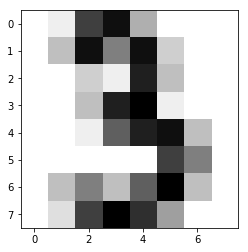

In [67]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plot
from sklearn import datasets,cluster,discriminant_analysis,neighbors,decomposition

digits=datasets.load_digits()

data=digits.data
target=digits.target

seq=np.arange(len(target))
np.random.shuffle(seq)

trainX=data[:int(0.8*len(target))]
trainY=target[:int(0.8*len(target))]
testX =data[int(0.8*len(target)):]
testY =target[int(0.8*len(target)):]

lda=discriminant_analysis.LinearDiscriminantAnalysis()
lda.fit(trainX,trainY)
predict=lda.predict(testX)
print(predict-testY)

plot.imshow(testX[1].reshape(8,8),cmap=plot.cm.gray_r)
plot.show()

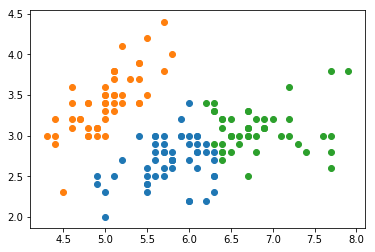

In [48]:
from sklearn.cluster import KMeans
import sklearn.datasets as datasets
import numpy as np
import scipy as sp
import matplotlib.pyplot as plot

data = datasets.load_iris()
features = data.data
target = data.target

result=KMeans(n_clusters=3).fit(features[:,:2])
colors=['red','green','blue']
for i,color in zip(range(0,3),colors):
    plot.scatter(features[result.labels_==i,0],features[result.labels_==i,1])
plot.show()

In [50]:
result.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

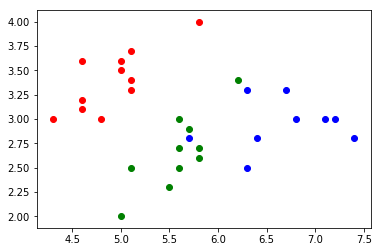

[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.
  0.  0.  0.  0.  1.  0.  0.  0.  0. -1.  0.  0.]


In [45]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plot
from sklearn import datasets, neighbors

iris = datasets.load_iris()
features = iris.data
target = iris.target

all=np.vstack([features[:,0],features[:,1],target]).T
np.random.shuffle(all)

training=all[:int(0.8*len(target)),:]
testing =all[int(0.8*len(target)):,:]

knn=neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(training[:,:2],training[:,2])
prediction=knn.predict(testing[:,:2])

colors=["red","green","blue"]
for i,color in zip(range(0,3),colors):
    plot.scatter(testing[prediction==i,0], testing[prediction==i,1], color=color)
plot.show()   
print(prediction-testing[:,2])

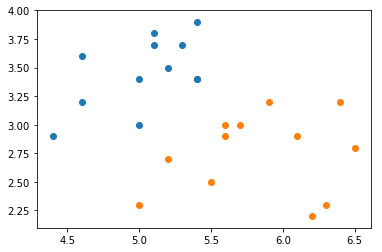

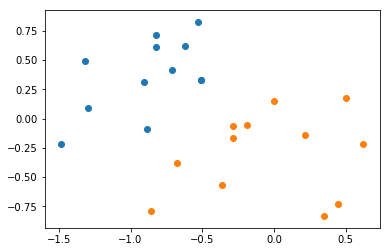

In [46]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plot
from sklearn import datasets, neighbors, cluster, decomposition, discriminant_analysis

iris=datasets.load_iris()
features=iris.data
target  =iris.target

all=np.vstack([features[:,0],features[:,1],target]).T
np.random.shuffle(all)

training=all[:int(0.8*len(target)),:]
testing =all[int(0.8*len(target)):,:]

pca=decomposition.PCA(n_components=2)
pca.fit(training[:,:2],training[:,2])
pcaResult=pca.transform(testing[:,:2])

colors=["red","green","blue"]
for i,color in zip(range(0,2),colors):
    plot.scatter(testing[testing[:,2]==i,0],testing[testing[:,2]==i,1])
plot.show() 

for i,color in zip(range(0,2),colors):
    plot.scatter(pcaResult[testing[:,2]==i,0],pcaResult[testing[:,2]==i,1])
plot.show()  

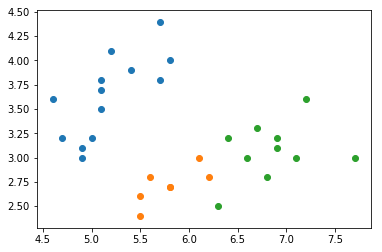

In [47]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plot
from sklearn import datasets, neighbors, cluster, discriminant_analysis

iris=datasets.load_iris()
features=iris.data
target=iris.target

all=np.vstack([features[:,0],features[:,1],target]).T
np.random.shuffle(all)

training=all[:int(0.8*len(target))]
testing=all[int(0.8*len(target)):]

lda=discriminant_analysis.LinearDiscriminantAnalysis()

lda.fit(training[:,:2],training[:,2])
prediction=lda.predict(testing[:,:2])

colors=["red","green","blue"]
for i,color in zip(range(0,3),colors):
    plot.scatter(testing[prediction==i,0],testing[prediction==i,1])
plot.show()